In [1]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 10})

In [2]:
#считываем датасет с диска
df = pd.read_csv('https://drive.google.com/uc?id=1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#K-means

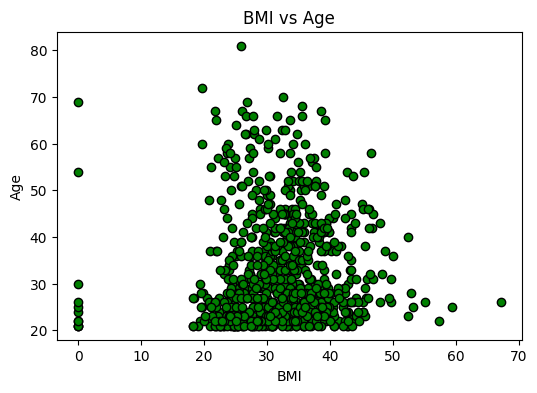

In [28]:
#Диаграмма рассеяния до кластеризации
plt.scatter(df['BMI'], df['Age'], facecolor='green', edgecolor='k')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs Age')
plt.show()

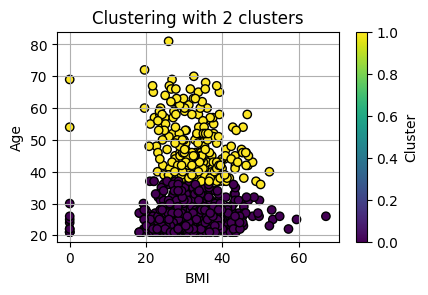

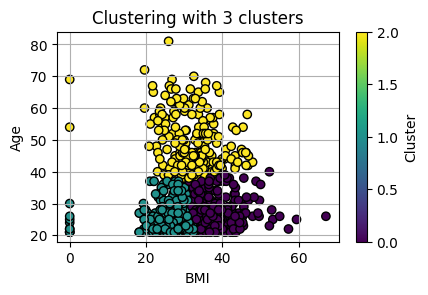

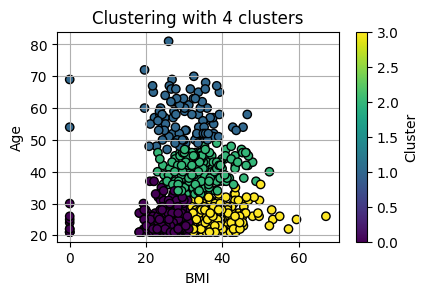

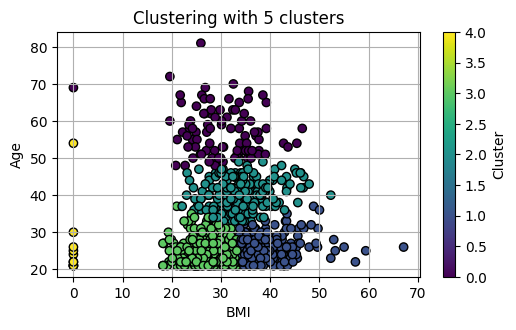

In [6]:
X1 = df[['BMI', 'Age']]
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, n_init=5)
    kmeans.fit(X1)
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, n_clusters-1)
    plt.scatter(df['BMI'], df['Age'], c=kmeans.labels_, cmap='viridis', edgecolor='k')
    plt.title(f'Clustering with {n_clusters} clusters')
    plt.xlabel('BMI')
    plt.ylabel('Age')
    plt.colorbar(label='Cluster')
    plt.grid(True)

plt.tight_layout()
plt.show()

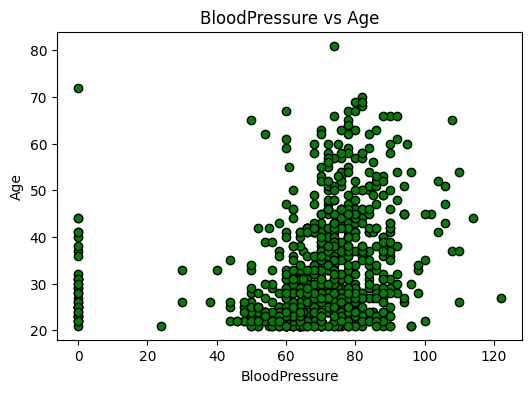

In [27]:
#Диаграмма рассеяния до кластеризации
plt.scatter(df['BloodPressure'], df['Age'],  facecolor='green', edgecolor='k')
plt.xlabel('BloodPressure')
plt.ylabel('Age')
plt.title('BloodPressure vs Age')
plt.show()

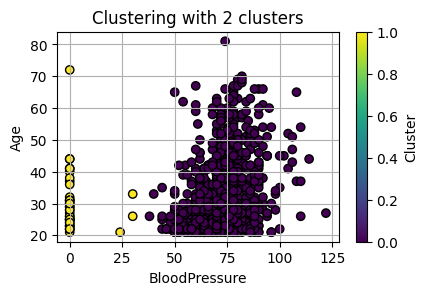

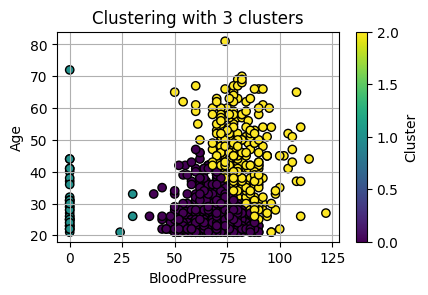

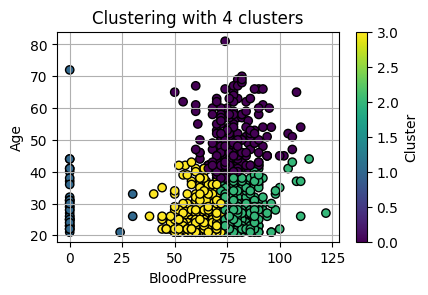

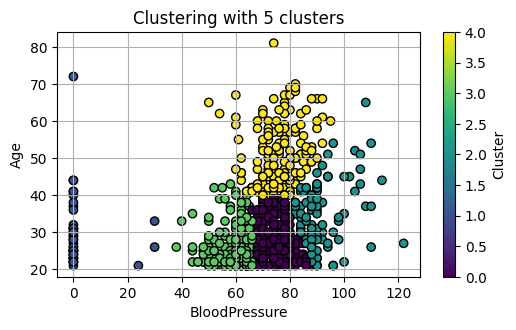

In [16]:
X2 = df[['BloodPressure', 'Age']]
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, n_init=5)
    kmeans.fit(X2)
    # Добавление столбца с кластерами
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, n_clusters-1)
    plt.scatter(df['BloodPressure'], df['Age'], c=kmeans.labels_, edgecolor='k')
    plt.title(f'Clustering with {n_clusters} clusters')
    plt.xlabel('BloodPressure')
    plt.ylabel('Age')
    plt.colorbar(label='Cluster')
    plt.grid(True)

plt.tight_layout()
plt.show()

#Иерархическая кластеризация

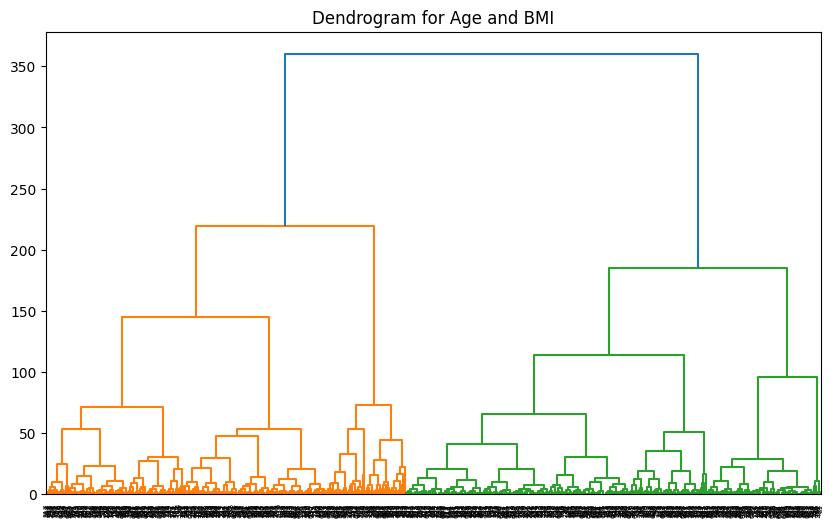

In [14]:
#Построение дендрограммы Age и BMI с помощью метода Варда
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clustering.fit(X1)
df['Cluster'] = agg_clustering.labels_

linked = linkage(X1, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Age and BMI')
plt.show()

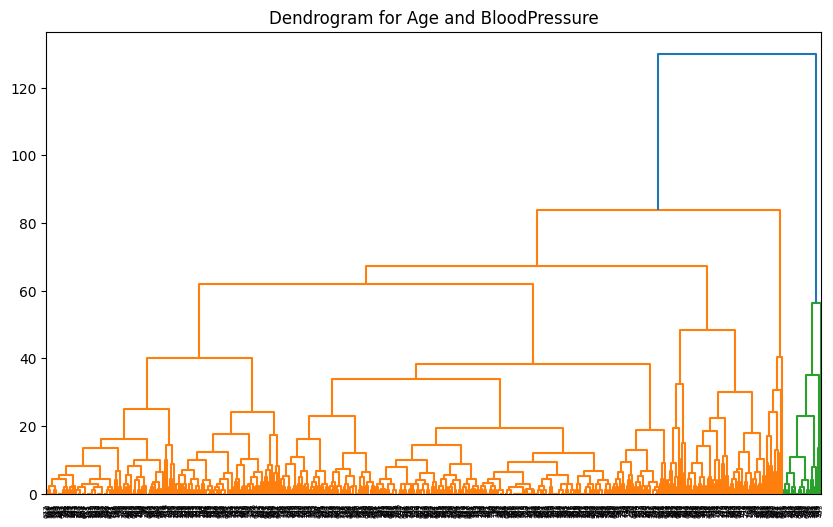

In [12]:
#Построение дендрограммы для признаков Age и BloodPressure с помощью метода полной связи
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg_clustering.fit(X2)
df['Cluster'] = agg_clustering.labels_

linked = linkage(X2, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Age and BloodPressure')
plt.show()